## Asynchronous I/O 
https://docs.python.org/3/library/asyncio.html

- Increase performance
- __concurrent__ task in code using the __async / await__ syntax. 


---

__Caution__

##### 1. Async IO is Not Easy

"Premature optimization is the root of all evils (or at least most of it) in programming" - Prof. Donald Knuth 

##### 2. asyncio module is under rapid development (use 3.7+)

---

### Performance Limitations: 

- CPU-bound, e.g. compute-intensive mathmatical programs. 
- I/O-ound, e.g. reading/writing to files, API calls, etc. 



### Python Solutions: 

- Multiprocessing: 
    - Spread tasks over multiple CPUs
    - multiprocessing module 


- Threading: 
    - Multiple threads working together 
    - Python GIL (Global Interpreter Lock)
    - Preemptive multiprocessing, threading and queue module.
    - Cooperative multiprocessing, asyncio module. 


### Asyncio Analolgy for Single CPU, single thread but doing concurrent tasks
Source: 
https://realpython.com/async-io-python/ 

https://www.youtube.com/watch?v=iG6fr81xHKA&t=269s (Miguel Grinberg's 2017 PyCon Talk)

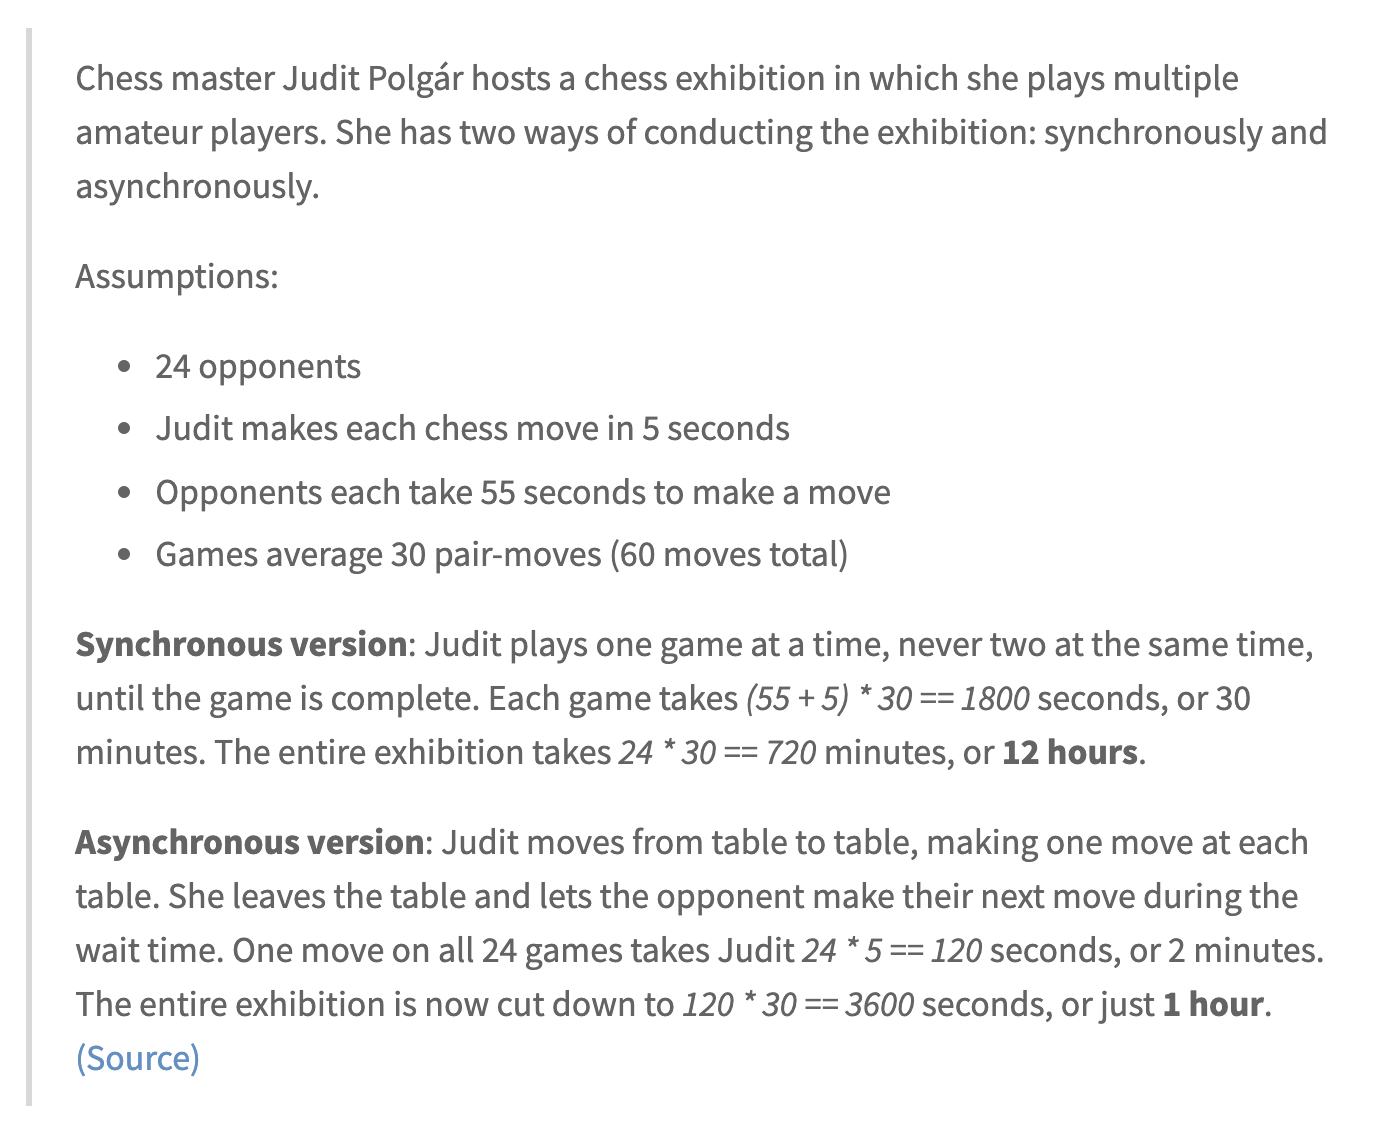

### Steps: 

- Your functions become coroutines by using the async keyword. 
- Within the async coroutine, use the await keyword to indicate the tasks you can delay and move away from while waiting (super important, 'awaitable' objects).
- Group these coroutines into an event loop, i.e. asyncio.gather(). 
- Run the event loop, asyncio.run() or asyncio.run_until_complete().


In [ ]:
# aiohttp is the async version of requests
!pip install aiohttp requests

### Sync and Async Comparison
#### Source: https://realpython.com/async-io-python/

In [2]:
import time

def count():
    print("One")
    time.sleep(1)
    print("Two")

def main():
    for _ in range(3):
        count()

if __name__ == "__main__":
    s = time.perf_counter()
    main()
    elapsed = time.perf_counter() - s
    print(f"executed in {elapsed:0.2f} seconds.")


One
Two
One
Two
One
Two
executed in 3.01 seconds.


In [3]:
# This program needs to be executed outside of Jupyter Notebook
import asyncio

async def count():
    print("One")
    await asyncio.sleep(1)
    print("Two")

async def main():
    await asyncio.gather(count(), count(), count())

if __name__ == "__main__":
    import time
    s = time.perf_counter()
    asyncio.run(main())
    elapsed = time.perf_counter() - s
    print(f"executed in {elapsed:0.2f} seconds.")


RuntimeError: asyncio.run() cannot be called from a running event loop

In [4]:
!curl http://127.0.0.1:8000/ip/192.168.2.60/version

{"output":"Cisco Nexus Operating System (NX-OS) Software\nTAC support: http://www.cisco.com/tac\nDocuments: http://www.cisco.com/en/US/products/ps9372/tsd_products_support_series_home.html\nCopyright (c) 2002-2016, Cisco Systems, Inc. All rights reserved.\nThe copyrights to certain works contained herein are owned by\nother third parties and are used and distributed under license.\nSome parts of this software are covered under the GNU Public\nLicense. A copy of the license is available at\nhttp://www.gnu.org/licenses/gpl.html.\n\nNX-OSv is a demo version of the Nexus Operating System\n\nSoftware\n  loader:    version N/A\n  kickstart: version 7.3(0)D1(1)\n  system:    version 7.3(0)D1(1)\n  kickstart image file is: bootflash:///titanium-d1-kickstart.7.3.0.D1.1.bin\n  kickstart compile time:  1/11/2016 16:00:00 [02/11/2016 10:30:12]\n  system image file is:    bootflash:///titanium-d1.7.3.0.D1.1.bin\n  system compile time:     1/11/2016 16:00:00 [02/11/2016 13:08:11]\n\n\nHardware\n  ci

In [5]:
# synchronous 'show version' from local FastAPI program
import time
import requests


devices = ['192.168.2.60', '192.168.2.61', '192.168.2.62',
           '192.168.2.50', '192.168.2.51', '192.168.2.52',
           '192.168.2.60', '192.168.2.61', '192.168.2.62',
           '192.168.2.50', '192.168.2.51', '192.168.2.52'
           ]


def worker(i, ip):
    time.sleep(1)
    print(f"I am session: {i}")
    url = f'http://127.0.0.1:8000/ip/{ip}/version'
    response = requests.get(url)
    return {"response": response}


def main():
    for i, ip in enumerate(devices):
        result = worker(i, ip)
        print(f'***** {result} *****')


if __name__ == "__main__":
    start = time.perf_counter()
    main()
    elapsed = time.perf_counter() - start
    print(f"executed in {elapsed} seconds.")


I am session: 0
***** {'response': <Response [200]>} *****
I am session: 1
***** {'response': <Response [200]>} *****
I am session: 2
***** {'response': <Response [200]>} *****
I am session: 3
***** {'response': <Response [200]>} *****
I am session: 4
***** {'response': <Response [200]>} *****
I am session: 5
***** {'response': <Response [200]>} *****
I am session: 6
***** {'response': <Response [200]>} *****
I am session: 7
***** {'response': <Response [200]>} *****
I am session: 8
***** {'response': <Response [200]>} *****
I am session: 9
***** {'response': <Response [200]>} *****
I am session: 10
***** {'response': <Response [200]>} *****
I am session: 11
***** {'response': <Response [200]>} *****
executed in 22.40048763499999 seconds.


In [ ]:
# asynchronous 'show version' from local FastAPI program
import asyncio
import time
import aiohttp


devices = ['192.168.2.60', '192.168.2.61', '192.168.2.62',
           '192.168.2.50', '192.168.2.51', '192.168.2.52',
           '192.168.2.60', '192.168.2.61', '192.168.2.62',
           '192.168.2.50', '192.168.2.51', '192.168.2.52'
           ]


async def worker(i, ip, session):
    time.sleep(1)
    print(f"I am session: {i}")
    url = f"http://127.0.0.1:8000/ip/{ip}/version"
    response = await session.request(method='GET', url=url)
    return {"response:": response}


async def main():
    async with aiohttp.ClientSession() as session:
        # asyncio.gather creates tasks in one shot
        combined_results = await asyncio.gather(*(worker(f'{i}', ip, session) for i, ip in enumerate(devices)))
        for result in combined_results:
            print(f'***** {result} *****')


if __name__ == "__main__":
    start = time.perf_counter()
    # introduced in 3.7, handles event loop
    # Pre-3.7 asyncio.get_event_loop().run_until_complete()
    asyncio.run(main())
    elapsed = time.perf_counter() - start
    print(f"executed in {elapsed} seconds.")


## Scrapli by Carl Montanari 

https://github.com/carlmontanari/scrapli

https://carlmontanari.github.io/scrapli/




---
Additional Resources 

https://docs.python.org/3/library/concurrency.html
    
https://realpython.com/async-io-python/

---
